<a href="https://www.kaggle.com/code/areffarzanieh/heart-disease-classification?scriptVersionId=101815330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df=pd.read_csv("../input/heart-disease-cleveland-uci/heart_cleveland_upload.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
#Checking for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [7]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 10)
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (222, 13)
X test shape: (75, 13)
y train shape: (222,)
y test shape: (75,)


In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Random Forest

random forest accuracy: 0.8133333333333334


<AxesSubplot:>

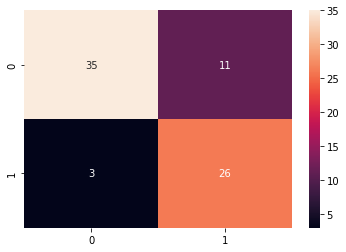

In [10]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_prediction = rfc.predict(X_test)
print(f'random forest accuracy: {accuracy_score(rfc_prediction,y_test)}')
sns.heatmap(confusion_matrix(rfc_prediction,y_test),annot=True)


In [11]:
grid_params = {'n_estimators':[50,100,200],'criterion':['gini', 'entropy', 'log_loss']}
rfc_grid = GridSearchCV(rfc,param_grid=grid_params)

In [12]:
rfc_grid.fit(X_train,y_train)
rfc_grid.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

In [13]:
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy')
rfc.fit(X_train,y_train)
rfc_prediction = rfc.predict(X_test)

random forest accuracy: 0.84


<AxesSubplot:>

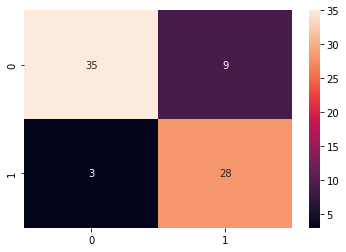

In [14]:
print(f'random forest accuracy: {accuracy_score(rfc_prediction,y_test)}')
sns.heatmap(confusion_matrix(rfc_prediction,y_test),annot=True)

## Logistic Regression

In [15]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)

In [16]:
print('logistic regression accuracy: %.2f'% accuracy_score(lr_prediction,y_test))

logistic regression accuracy: 0.88


<AxesSubplot:>

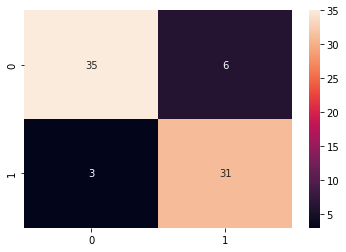

In [17]:
sns.heatmap(confusion_matrix(lr_prediction,y_test),annot=True)